In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy

In [3]:

def fft(f):
    n = len(f) #
    fhat = np.zeros(f.shape, dtype=complex)
    for k in range(n): 
        fhat[k] = np.sum(f   * np.exp(- 2j * np.pi * k * np.arange(n)/n))

    return fhat

def ifft(fhat):
    n = len(fhat)
    f = np.zeros(fhat.shape, dtype=complex)
    for x in range(n):  
        f[x]   = np.sum(fhat * np.exp(  2j * np.pi * x * np.arange(n)/n)) / len(fhat)

    return f

/home/calab912/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


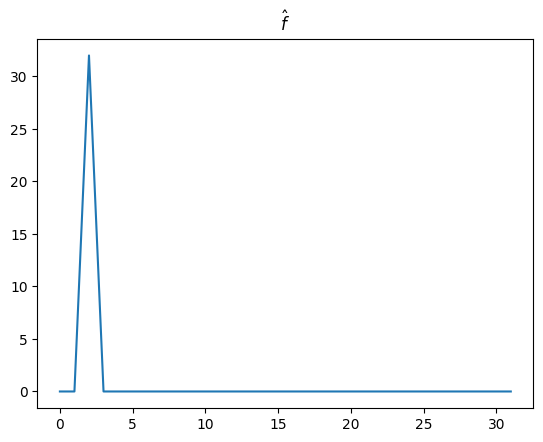

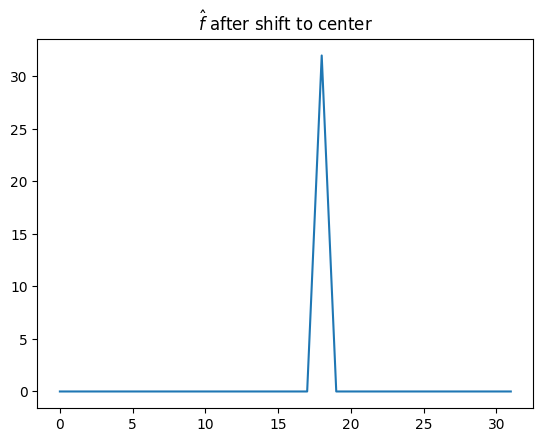

/home/calab912/.local/lib/python3.8/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


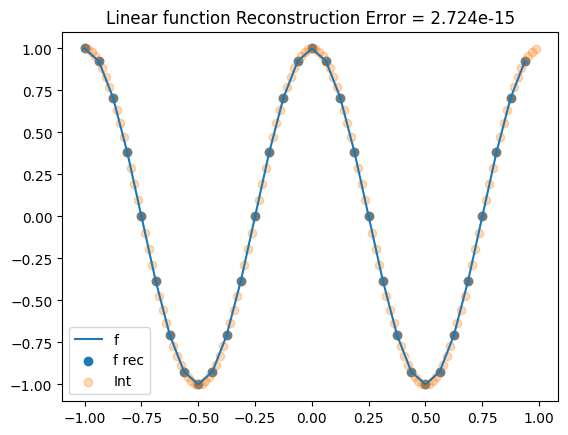

In [4]:
L = 2
N = 32
Ni = 128
k = 2*np.pi / L * np.arange(-N/2, N/2) 
x  = np.linspace(-1, 1, N+1)[:-1]
xi = np.linspace(-1, 1, Ni+1)[:-1]

def func(x): 
    return np.exp(1j*2*np.pi*x)

f    = func(x) 
fhat = fft(f)
plt.title(r"$\hat{f}$")
plt.plot(fhat)
plt.show()
ft   = np.fft.fftshift(fhat)
plt.title(r"$\hat{f}$ after shift to center")
plt.plot(ft)
plt.show()
Npad = int(Ni/2 - N/2) 
ft_pad = np.concatenate([np.zeros(Npad), ft, np.zeros(Npad)])
frec = ifft(fhat)
fint = ifft(np.fft.fftshift(ft_pad)) * Ni/N 
plt.title(f"Linear function Reconstruction Error = {np.mean(np.abs(fint - func(xi))):3.3e}") 
plt.plot(x, f, label="f")
plt.scatter(x, frec, label="f rec")
plt.scatter(xi, fint, label="Int", alpha=0.3)
plt.legend()
plt.show()

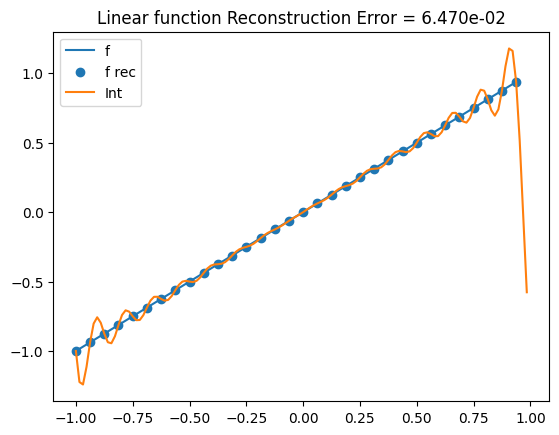

In [5]:
L = 2
N = 32
Ni = 128
k = 2*np.pi / L * np.arange(-N/2, N/2) 
x  = np.linspace(-1, 1, N  + 1)[:-1]
xi = np.linspace(-1, 1, Ni + 1)[:-1]

def func(x): 
    return x

f    = func(x) 
fhat = fft(f)
Npad = int(Ni/2 - N/2) 
ft   = np.fft.fftshift(fhat)
ft_pad = np.concatenate([np.zeros(Npad), ft, np.zeros(Npad)])
frec = ifft(fhat)
fint = ifft(np.fft.fftshift(ft_pad)) * Ni/N 
plt.title(f"Linear function Reconstruction Error = {np.mean(np.abs(fint - func(xi))):3.3e}") 
plt.plot(x, f, label="f")
plt.scatter(x, frec, label="f rec")
plt.plot(xi, fint, label="Int")
plt.legend()
plt.show()

/home/calab912/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


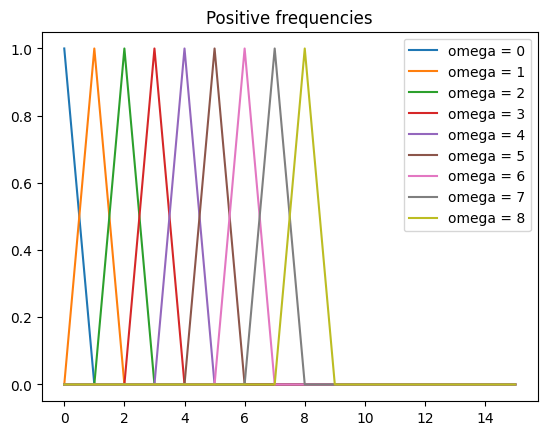

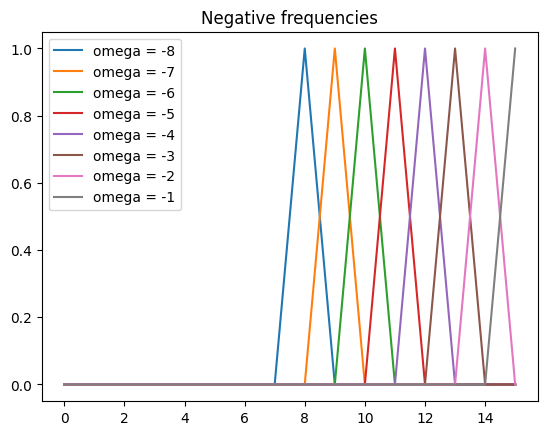

In [261]:
L = 2
N = 16
Ni = 16
x  = np.linspace(-1, 1, N  + 1)[:-1]
xi = np.linspace(-1, 1, Ni + 1)[:-1]



alpha = 1/4
beta = 1/4


def fft(f):
    n = len(f)
    N = int(n/2)
    fhat = np.zeros( n, dtype=complex)
    for k in range( n ):
        #x-array in [-1, 1]
        x     = (-1 + np.arange(n) / N )
        waves = np.exp(- 1j * np.pi * k * x )
        #normalisation
        C     = 1/(2 * N) 
        fhat[k] = C * np.sum( f *  waves )

    return fhat


def ifft(fhat):
    n = len(fhat)
    N = int(n/2)
    f = np.zeros( n, dtype=complex )
    for i, x in enumerate(-1 + np.arange(n) / N ):
        k     = np.arange( n )
        waves = np.exp(1j * np.pi * k * x )
        f[i]  = np.sum( fhat *  waves )

    return f


plt.title("Positive frequencies")
for omega in range(0, 9): 
    def func(x): 
        #return np.cos(1.4 * np.pi * (x - 1))
        return np.exp(1j * np.pi * omega * x)

    f = func(x) 
    fhat = fft(func(x))
    plt.plot(fhat, label=f"omega = {omega}")
    frec = ifft(fhat)
plt.legend()
plt.show()

plt.title("Negative frequencies")
for omega in range(-8, 0): 
    def func(x): 
        #return np.cos(1.4 * np.pi * (x - 1))
        return np.exp(1j * np.pi * omega * x)

    f = func(x) 
    fhat = fft(func(x))
    plt.plot(fhat, label=f"omega = {omega}")
    frec = ifft(fhat)
plt.legend()
plt.show()

Natural ordering of momenta:
k0 * [1, 2, 3, 4, 5, .., N (Nyquist frequency), -N, -N+1, ..., -1]

In [257]:

def fft2gegenbauer(fhat, alpha, beta):
    # 1 (zero-mode) + 2N - 1 (N positive frequencies, N-1 negative frequencies)
    # since we cannot distinguish the Nth positive and Nth negative frequency we need to discard them
    n   = len(fhat)
    # number of positive frequencies
    N   = int(n/2)
    # Gegenbauer parameter lambda as function of N
    lam = int(alpha * N + 1)
    # Gamma function 
    gam = scipy.special.gamma(lam)
    # Number of terms in Gegenbauer expansion
    m   = int(beta * N + 1)
    # Gegenbauer coefficients
    g   = np.zeros(m, dtype=complex)
    for l in range( m ):  
        # 2N - 1 (N positive frequencies, N-1 negative frequencies) 
        k      = np.concatenate([np.arange(1, N + 1),-np.flip(np.arange(1, N + 1))])
        fmat   = np.concatenate([fhat[1:N], [0,0], fhat[N+1:]])
        #plt.title(f"k = {k}")
        #plt.plot(fmat)
        #plt.show()
        bessel = scipy.special.jv(l + lam, np.pi * k)
        coeff  = gam * bessel * (2 / (np.pi * k))**lam 
        g[l]   = (l == 0) * fhat[0] \
                 + (1j)**l * (l + lam) * np.sum(coeff * fmat)

    return g, lam


def igegenbauer(g, lam, x): 
    n = len(x)
    f = np.zeros(x.shape, dtype=complex)
    for l, coeff in enumerate(g):
        f += coeff * scipy.special.eval_gegenbauer(l, lam, x)

    return f

### Reconstruction of linear function

### $$ f(x) = x $$

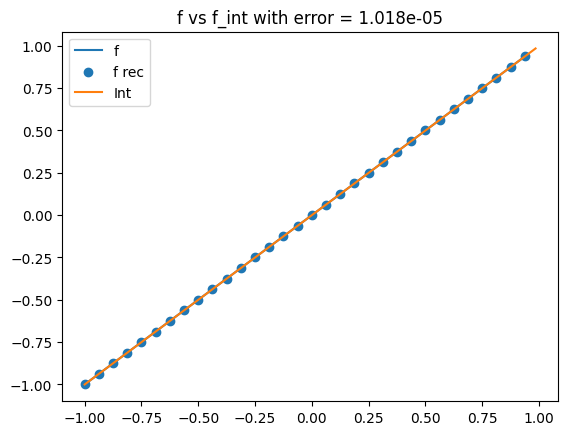

In [263]:
L  = 2
N  = 32
Ni = 128
def func(x): 
    return x#np.cos(1.4 * np.pi * (x - 1))

x  = np.linspace(-1, 1, N  + 1)[:-1]
xi = np.linspace(-1, 1, Ni + 1)[:-1]

f      = func(x) 
fhat   = fft(f)
frec   = ifft(fhat)
g, lam = fft2gegenbauer(fhat, alpha, beta) 
fint   = igegenbauer(g, lam, xi)

plt.title(f"f vs f_int with error = {np.mean(np.abs(func(xi) - fint)):3.3e}") 
plt.plot(x, f, label="f")
plt.scatter(x, frec.real, label="f rec")
plt.plot(xi, fint.real, label="Int")
plt.legend()
plt.show()

In [260]:
frec

array([-1.+1.49369888e-15j, -1.+9.84914034e-02j, -1.+1.98912367e-01j,
       -1.+3.03346684e-01j, -1.+4.14213562e-01j, -1.+5.34511136e-01j,
       -1.+6.68178638e-01j, -1.+8.20678791e-01j, -1.+1.00000000e+00j,
       -1.+1.21850353e+00j, -1.+1.49660576e+00j, -1.+1.87086841e+00j,
       -1.+2.41421356e+00j, -1.+3.29655821e+00j, -1.+5.02733949e+00j,
       -1.+1.01531704e+01j, -1.+0.00000000e+00j, -1.-1.01531704e+01j,
       -1.-5.02733949e+00j, -1.-3.29655821e+00j, -1.-2.41421356e+00j,
       -1.-1.87086841e+00j, -1.-1.49660576e+00j, -1.-1.21850353e+00j,
       -1.-1.00000000e+00j, -1.-8.20678791e-01j, -1.-6.68178638e-01j,
       -1.-5.34511136e-01j, -1.-4.14213562e-01j, -1.-3.03346684e-01j,
       -1.-1.98912367e-01j, -1.-9.84914034e-02j])

We conclude that we can reconstruct the linear function without oscillations from the spectrum. 

### $$ f(x) = \cos(1.4 \pi (x - 1)) $$

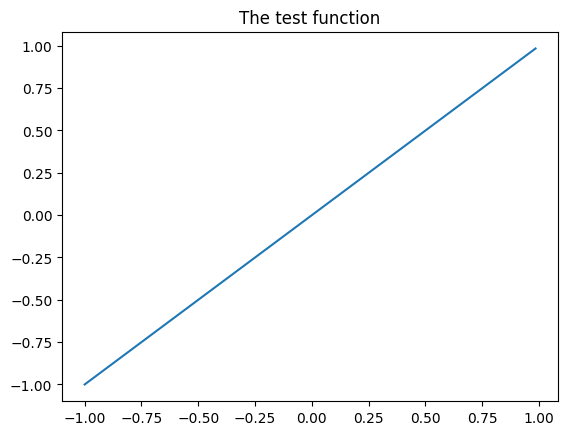

16 8
24 12
36 18
52 26


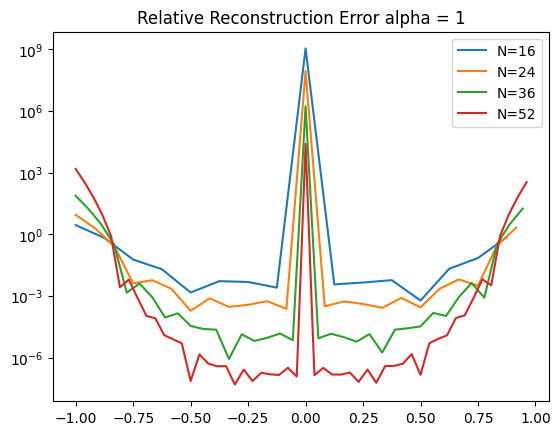

16 8
24 12
36 18
52 26


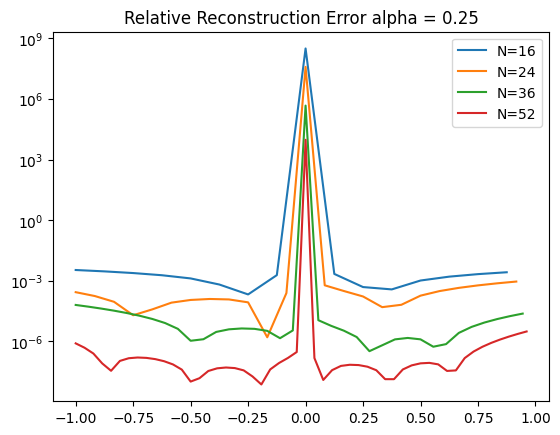

16 8
24 12
36 18
52 26


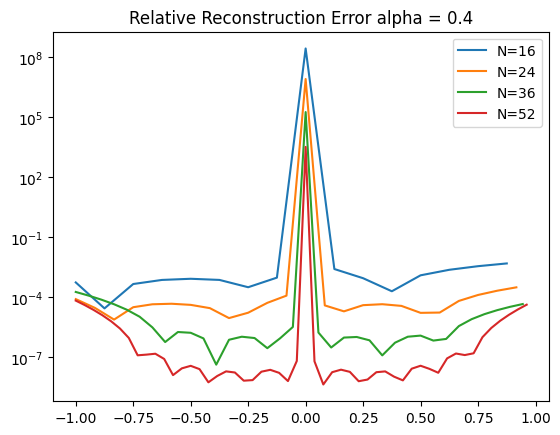

In [245]:
L  = 2
N  = 128
Ni = 128
def func(x): 
    return x#np.cos(1.4 * np.pi * (x - 1))

x  = np.linspace(-1, 1, N  + 1)[:-1]
xi = np.linspace(-1, 1, Ni + 1)[:-1]

plt.title("The test function") 
plt.plot(x, func(x))
plt.show()

alphas      = [1, 1/4, 2/5]
resolutions = [16, 24, 36, 52]
for alpha, beta in zip(alphas, alphas): 
    plt.title(f"Relative Reconstruction Error alpha = {alpha}") 
    plt.yscale("log")
    for N, Ni in zip(resolutions, resolutions):
        x      = np.linspace(-1, 1, N  + 1)[:-1]
        xi     = np.linspace(-1, 1, Ni + 1)[:-1]
        f      = func(x) 
        fhat   = fft(f)
        g, lam = fft2gegenbauer(fhat, alpha, beta) 
        fint   = igegenbauer(g, lam, xi)
        #plt.title("f vs fint") 
        #plt.plot(f.real, label="f")
        #plt.plot(fint.real, label="fint") 
        #plt.legend()
        #plt.show()
        plt.plot(xi, np.abs((func(xi) - fint)/(func(xi)+1e-12)), label=f"N={N}")
    plt.legend()
    plt.show()


### Compare Gegenbauer coefficients reconstructed from FFT for plane wave

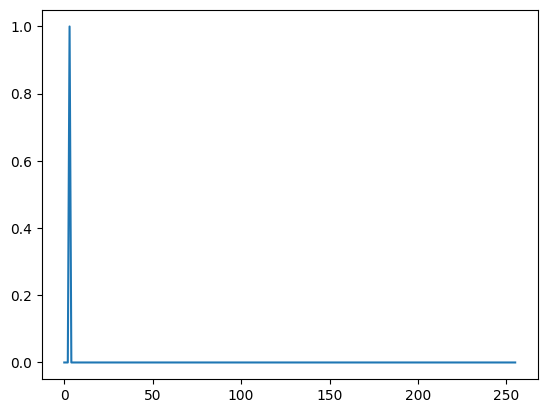

Num vs exact: Diff 5.580e-16
Num vs exact: Diff 4.174e-17
Num vs exact: Diff 1.759e-17
Num vs exact: Diff 5.652e-18
Num vs exact: Diff 1.769e-18
Num vs exact: Diff 5.534e-19
Num vs exact: Diff 1.768e-19
Num vs exact: Diff 5.722e-20
Num vs exact: Diff 1.931e-20
Num vs exact: Diff 6.280e-21
Num vs exact: Diff 2.170e-21
Num vs exact: Diff 6.489e-22
Num vs exact: Diff 2.156e-22
Num vs exact: Diff 4.758e-23
Num vs exact: Diff 1.351e-23
Num vs exact: Diff 7.190e-25
Num vs exact: Diff 5.923e-25
Num vs exact: Diff 9.627e-25
Num vs exact: Diff 2.616e-25
Num vs exact: Diff 1.293e-25
Num vs exact: Diff 1.902e-26
Num vs exact: Diff 2.797e-26
Num vs exact: Diff 3.195e-26
Num vs exact: Diff 2.200e-26
Num vs exact: Diff 1.481e-26
Num vs exact: Diff 8.670e-27
Num vs exact: Diff 5.189e-27
Num vs exact: Diff 2.783e-27
Num vs exact: Diff 1.651e-27
Num vs exact: Diff 8.223e-28
Num vs exact: Diff 5.103e-28
Num vs exact: Diff 2.314e-28
Num vs exact: Diff 1.515e-28
Num vs exact: Diff 5.837e-29


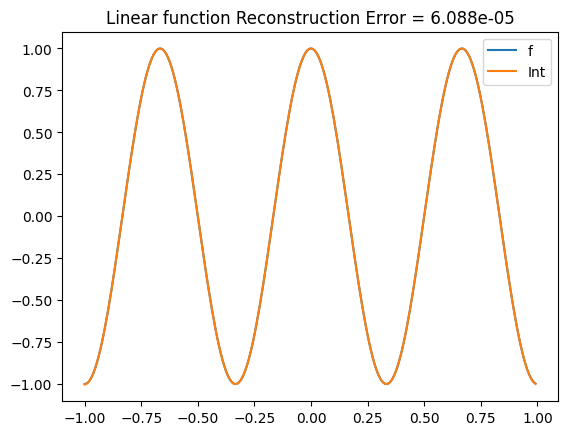

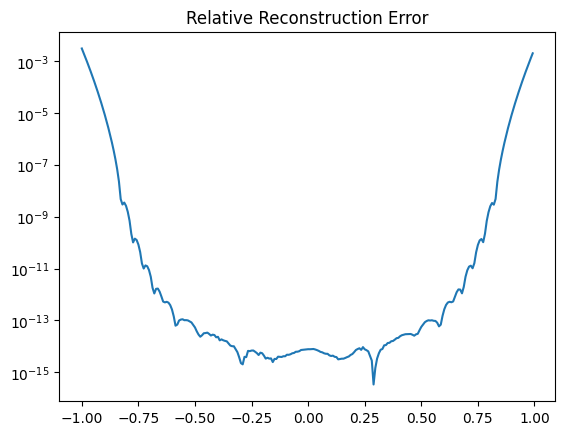

In [211]:
L  = 2
N  = 256
Ni = 256
x  = np.linspace(-1, 1, N  + 1)[:-1]
xi = np.linspace(-1, 1, Ni + 1)[:-1]

omega = 3

def func(x): 
    #return np.cos(1.4 * np.pi * (x - 1))
    return np.exp(1j * np.pi * omega * x)


alpha = 1/4
beta  = 1/4


def exactgegenbauer(fhat):
    n      = len(fhat)
    N      = int(n/2)
    lam    = alpha * N 
    gam    = scipy.special.gamma(lam)
    m      = int(beta * N + 2)
    g      = np.zeros(m, dtype=complex)
    for l in range(m):  
        bessel = scipy.special.jv(l + lam, np.pi * omega)
        coeff  = gam * bessel * (2 / (np.pi * omega))**lam
        g[l]   = coeff * (1j)**l * (l + lam) 

    return g, lam 

f           = func(x) 
fhat        = fft(f)
plt.plot(fhat)
plt.show()
g,      lam = fft2gegenbauer(fhat) 
gexact, lam =  exactgegenbauer(fhat)
for c1, c2 in zip(g, gexact): 
    print(f"Num vs exact: Diff {np.abs(c1 - c2):3.3e}")# {c1} vs {c2}")


fint = igegenbauer(g, lam, xi)
plt.title(f"Linear function Reconstruction Error = {np.mean(np.abs(fint - func(xi))):3.3e}") 
plt.plot(x, f, label="f")
plt.plot(xi, fint, label="Int")
plt.legend()
plt.show()

plt.title(f"Relative Reconstruction Error") 
plt.yscale("log")
plt.plot(xi, np.abs((func(xi) - fint)/func(xi)))
plt.show()
